In [111]:
import matplotlib
from scipy.optimize import root_scalar
import numpy as np
import matplotlib.pyplot as plt

In [96]:
thomson_cross = 0.665e-24

This first root scalar function is used in order to find the values of ne/H as neither were explicitly stated in the text. In this case, we are assuming (from the text) that Xe is 1 and z >> 10^3 and values were chosen based on the figure 4.4 in the text.

In [106]:
def f(y):
    return (123 *  (1) * (0.01/0.022) * (0.14/0.1431) ** (1/2) * ((1+5000)/1000) ** (3/2) * (1 + (1+5000)/3360 * (0.14/0.1431))**(-1/2) - (thomson_cross * y))

In [107]:

pts = root_scalar(f ,x0 = 10, x1 = 5)
print(pts.root)

7.5


Here now that we have the missing value, we can use what we have found from the text in order to observe how z changes with $\Omega_b h^2$. 

In [99]:
x = np.linspace(0.01, 0.05, 100)
y = np.zeros(100)

In [108]:
for i in range(10):
    def f(y):
        return (123 *  (1) * (x[i]/0.022) * (0.14/0.1431) ** (1/2) * ((1+y)/1000) ** (3/2) * (1 + (1+y)/3360 * (0.14/0.1431))**(-1/2) - (thomson_cross * 7.5))
    pts = root_scalar(f ,x0 = 10, x1 = 5)
    y[i] += pts.root
    

In [109]:
print(y)

[4999.00000001 3699.42680537 2986.56363156 2530.97937517 2212.12213073
 1975.07522169 1791.10393344 1643.65285682 1522.48077347 1420.89596131]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


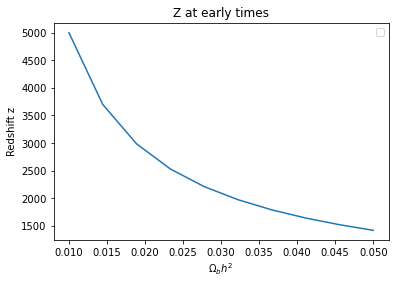

In [116]:
plt.figure()
plt.plot(x, y)
plt.title("Z at early times")
plt.xlabel('$\Omega_b h^2$')
plt.ylabel("Redshift z")
plt.legend()